In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date, datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Load the dataset
data = pd.read_csv(r'C:\Users\admin\Downloads\Shopping_Revenue.csv')


In [5]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
0,0,7/17/1999,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3.0,5,3,4,5,5,4,3,4,5653753
1,1,2/14/2008,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,6923131
2,2,3/9/2013,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,3.0,0,0,0,0,0,0,0,0,2055379
3,3,2/2/2012,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,7.5,25,12,10,6,18,12,12,6,2675511
4,4,5/9/2009,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3.0,5,1,3,2,3,4,3,3,4316715


In [6]:
data.shape

(137, 43)

In [7]:
data.columns

Index(['Id', 'Open Date', 'City', 'City Group', 'Type', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37', 'revenue'],
      dtype='object')

In [8]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            4
P7            4
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [9]:
data.fillna(data.mean(),inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\50576068.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.fillna(data.mean(),inplace=True)


In [10]:
data.isnull().sum()

Id            0
Open Date     0
City          0
City Group    0
Type          0
P1            0
P2            0
P3            0
P4            0
P5            0
P6            0
P7            0
P8            0
P9            0
P10           0
P11           0
P12           0
P13           0
P14           0
P15           0
P16           0
P17           0
P18           0
P19           0
P20           0
P21           0
P22           0
P23           0
P24           0
P25           0
P26           0
P27           0
P28           0
P29           0
P30           0
P31           0
P32           0
P33           0
P34           0
P35           0
P36           0
P37           0
revenue       0
dtype: int64

In [11]:
cat_cols=['Open Date','City','City Group','Type']
num_cols=['Id','P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'P27', 'P28', 'P29', 'P30', 'P31', 'P32', 'P33', 'P34', 'P35',
       'P36', 'P37']

In [12]:
data["Open Date"] = pd.to_datetime(data["Open Date"])
data["month"] = pd.to_datetime(data["Open Date"]).dt.month
data["year"] = pd.to_datetime(data["Open Date"]).dt.year

In [13]:
data.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P31,P32,P33,P34,P35,P36,P37,revenue,month,year
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,3,4,5,5,4,3,4,5653753,7,1999
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,6923131,2,2008
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,2055379,3,2013
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,12,10,6,18,12,12,6,2675511,2,2012
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,1,3,2,3,4,3,3,4316715,5,2009


In [14]:
curr_time=pd.to_datetime("now")
data['launch_days'] = (curr_time - data['Open Date'])
data

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\3477310488.py:1: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  curr_time=pd.to_datetime("now")


,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,month,year,launch_days
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,4,5,5,4,3,4,5653753,7,1999,8900 days 14:02:16.718899
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,6923131,2,2008,5766 days 14:02:16.718899
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,2055379,3,2013,3916 days 14:02:16.718899
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,10,6,18,12,12,6,2675511,2,2012,4317 days 14:02:16.718899
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,3,2,3,4,3,3,4316715,5,2009,5316 days 14:02:16.718899
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,2008-06-25,Trabzon,Other,FC,2,3.0,3.0,5.0,4,...,0,0,0,0,0,0,5787594,6,2008,5634 days 14:02:16.718899
133,133,2006-10-12,İzmir,Big Cities,FC,4,5.0,4.0,4.0,2,...,0,0,0,0,0,0,9262754,10,2006,6256 days 14:02:16.718899
134,134,2006-07-08,Kayseri,Other,FC,3,4.0,4.0,4.0,2,...,0,0,0,0,0,0,2544857,7,2006,6352 days 14:02:16.718899
135,135,2010-10-29,İstanbul,Big Cities,FC,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,7217634,10,2010,4778 days 14:02:16.718899


In [15]:
target=['revenue']
used_cols = [c for c in data.columns.tolist() if c not in [target]]
X=data[used_cols]
y=data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)
print(X_train.describe(), X_test.describe(), y_train.describe(), y_test.describe())
print(X_train.isnull().sum(), X_test.isnull().sum(), y_train.isnull().sum(), y_test.isnull().sum())

(82, 46) (55, 46) (82, 1) (55, 1)
               Id         P1         P2         P3         P4         P5  \
count   82.000000  82.000000  82.000000  82.000000  82.000000  82.000000   
mean    68.536585   4.231707   4.536585   4.353659   4.451220   1.963415   
std     40.336607   3.120220   1.543166   1.001504   1.044119   1.116046   
min      0.000000   1.000000   1.000000   2.000000   3.000000   1.000000   
25%     34.250000   2.000000   4.000000   4.000000   4.000000   1.000000   
50%     68.000000   3.000000   5.000000   4.000000   4.000000   2.000000   
75%    101.750000   4.000000   5.000000   5.000000   5.000000   2.000000   
max    136.000000  12.000000   7.500000   7.500000   7.500000   8.000000   

              P6         P7         P8         P9  ...        P32        P33  \
count  82.000000  82.000000  82.000000  82.000000  ...  82.000000  82.000000   
mean    3.247845   5.529250   5.146341   5.463415  ...   2.719512   1.219512   
std     2.202881   2.409319   1.931685   

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\1489309624.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(X_train.corr(),annot=True,cbar=False,cmap='Reds')


<Axes: >

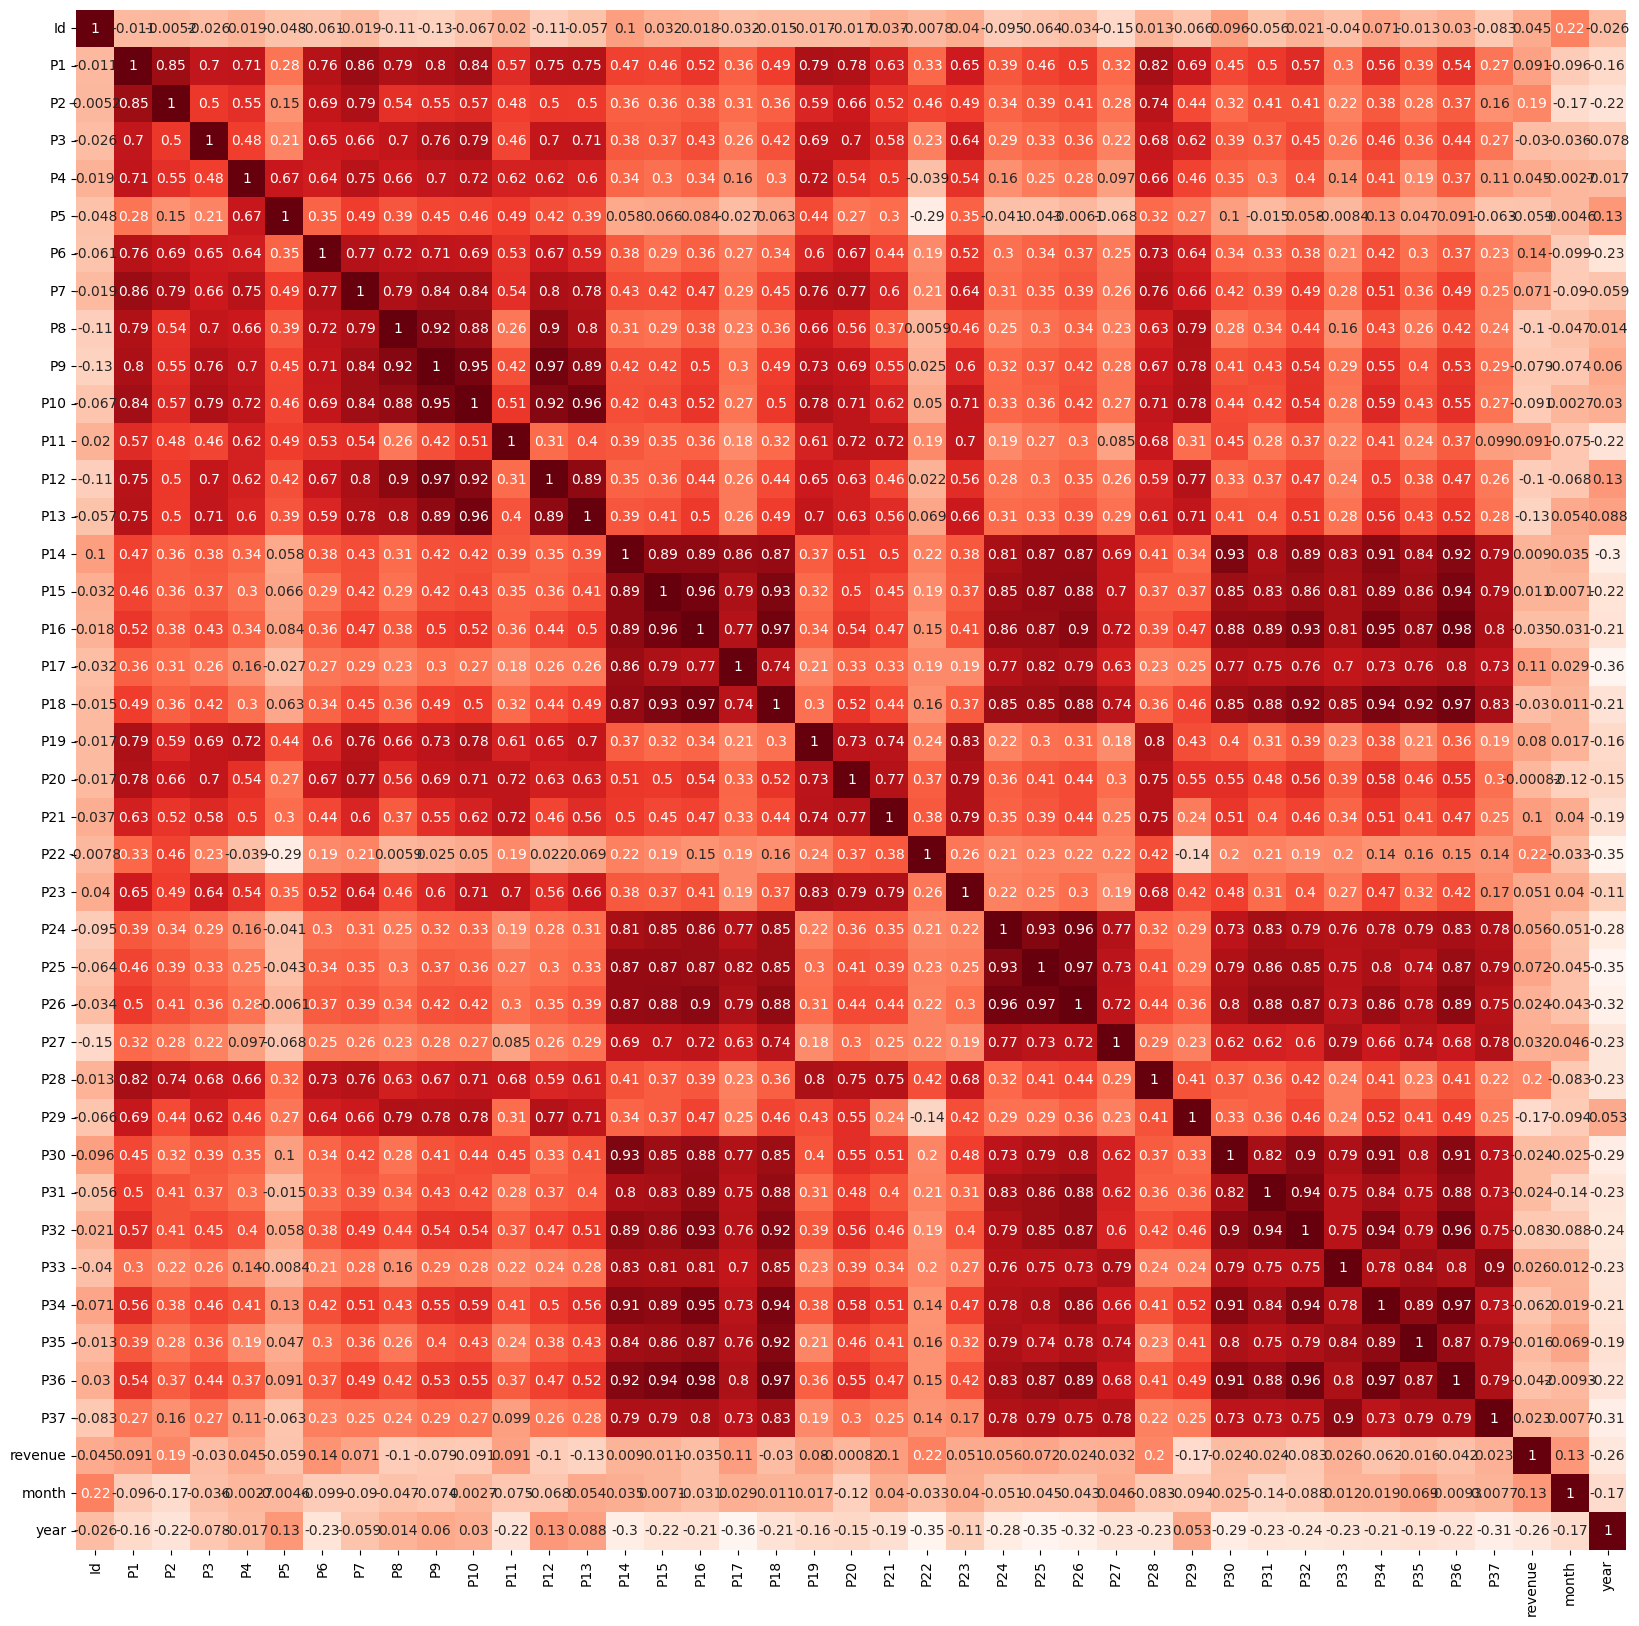

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(X_train.corr(),annot=True,cbar=False,cmap='Reds')

<Axes: xlabel='revenue'>

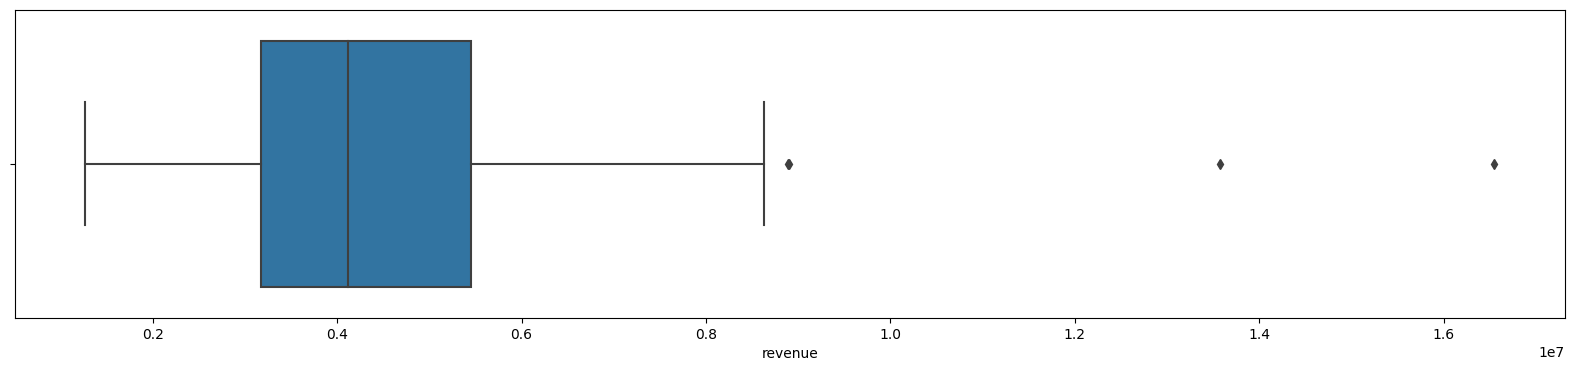

In [17]:
plt.figure(figsize=(20,4))
sns.boxplot(x='revenue',data=X_train)

In [18]:
from scipy.stats import iqr

upper_limit = X_train.revenue.quantile(0.75) + (1.5* iqr(X_train.revenue))
lower_limit = X_train.revenue.quantile(0.25)- (1.5* iqr(X_train.revenue))

condition = (X_train.revenue > upper_limit) | (X_train.revenue<lower_limit)
X_train[condition]

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,month,year,launch_days
99,99,1999-12-18,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,4,2,5,5,5,3,13575224,12,1999,8746 days 14:02:16.718899
24,24,2009-09-20,İstanbul,Big Cities,IL,5,5.0,3.0,5.0,2,...,4,4,4,4,5,2,8904084,9,2009,5182 days 14:02:16.718899
116,116,2012-03-30,İzmir,Big Cities,FC,2,4.0,4.0,4.0,2,...,0,0,0,0,0,0,8894598,3,2012,4260 days 14:02:16.718899
75,75,2005-10-15,İstanbul,Big Cities,FC,5,5.0,4.0,5.0,1,...,0,0,0,0,0,0,16549064,10,2005,6618 days 14:02:16.718899


In [19]:
rev_filter = (X_train.revenue < 10000000)
X_train = X_train[rev_filter]

X_train.shape

(80, 46)

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\3541273027.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_train.groupby(['year']).mean()['revenue'].plot.bar(ax=ax2, width=0.7)


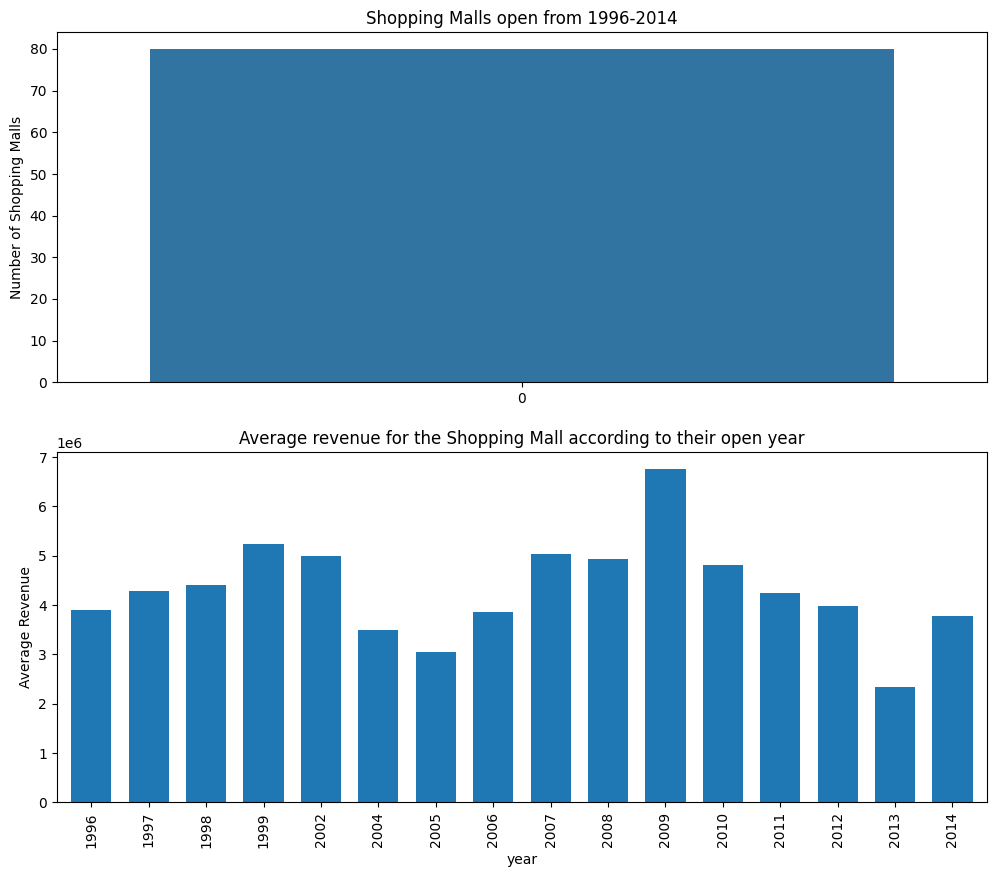

In [20]:
fig = plt.figure(figsize=(12,10))
ax1=fig.add_subplot(2,1,1)
ax2=fig.add_subplot(2,1,2)

sns.countplot(X_train.year,ax=ax1)
ax1.set_title('Shopping Malls open from 1996-2014')
ax1.set_ylabel('Number of Shopping Malls')

X_train.groupby(['year']).mean()['revenue'].plot.bar(ax=ax2, width=0.7)
ax2.set_title('Average revenue for the Shopping Mall according to their open year')
ax2.set_ylabel('Average Revenue')

plt.show()

<Axes: xlabel='year', ylabel='revenue'>

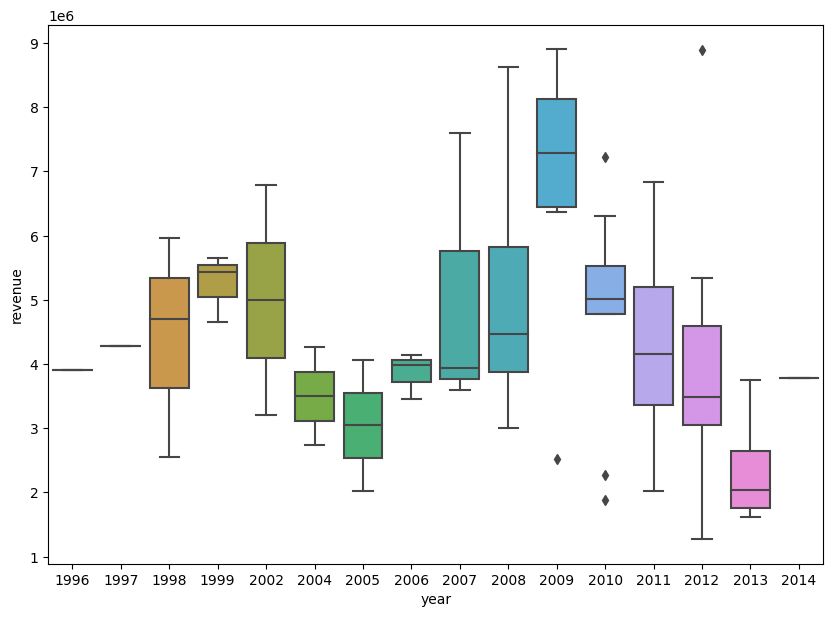

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x='year',y='revenue', data=X_train)

In [22]:
X_train['City Group'].value_counts()

Big Cities    45
Other         35
Name: City Group, dtype: int64

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\2561716284.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_train.groupby(['City Group']).mean()['revenue'].plot.bar(ax=ax1)


<Axes: xlabel='City Group', ylabel='revenue'>

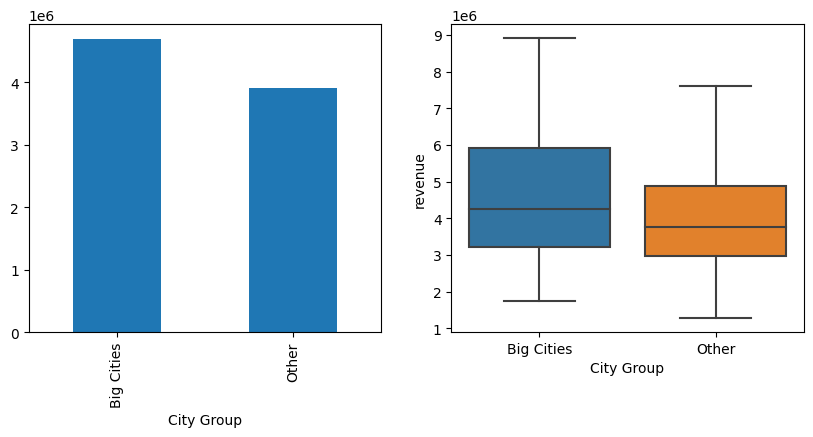

In [23]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
X_train.groupby(['City Group']).mean()['revenue'].plot.bar(ax=ax1)
sns.boxplot(x='City Group',y='revenue', data=X_train,ax=ax2)

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\4256384140.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_train.groupby(['City']).mean()['revenue'].plot.barh(figsize=(20,20))


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Adana'),
  Text(0, 1, 'Afyonkarahisar'),
  Text(0, 2, 'Amasya'),
  Text(0, 3, 'Ankara'),
  Text(0, 4, 'Antalya'),
  Text(0, 5, 'Aydın'),
  Text(0, 6, 'Balıkesir'),
  Text(0, 7, 'Bursa'),
  Text(0, 8, 'Diyarbakır'),
  Text(0, 9, 'Edirne'),
  Text(0, 10, 'Elazığ'),
  Text(0, 11, 'Eskişehir'),
  Text(0, 12, 'Kocaeli'),
  Text(0, 13, 'Konya'),
  Text(0, 14, 'Kütahya'),
  Text(0, 15, 'Kırklareli'),
  Text(0, 16, 'Muğla'),
  Text(0, 17, 'Osmaniye'),
  Text(0, 18, 'Sakarya'),
  Text(0, 19, 'Samsun'),
  Text(0, 20, 'Tekirdağ'),
  Text(0, 21, 'Trabzon'),
  Text(0, 22, 'Uşak'),
  Text(0, 23, 'İstanbul'),
  Text(0, 24, 'İzmir')])

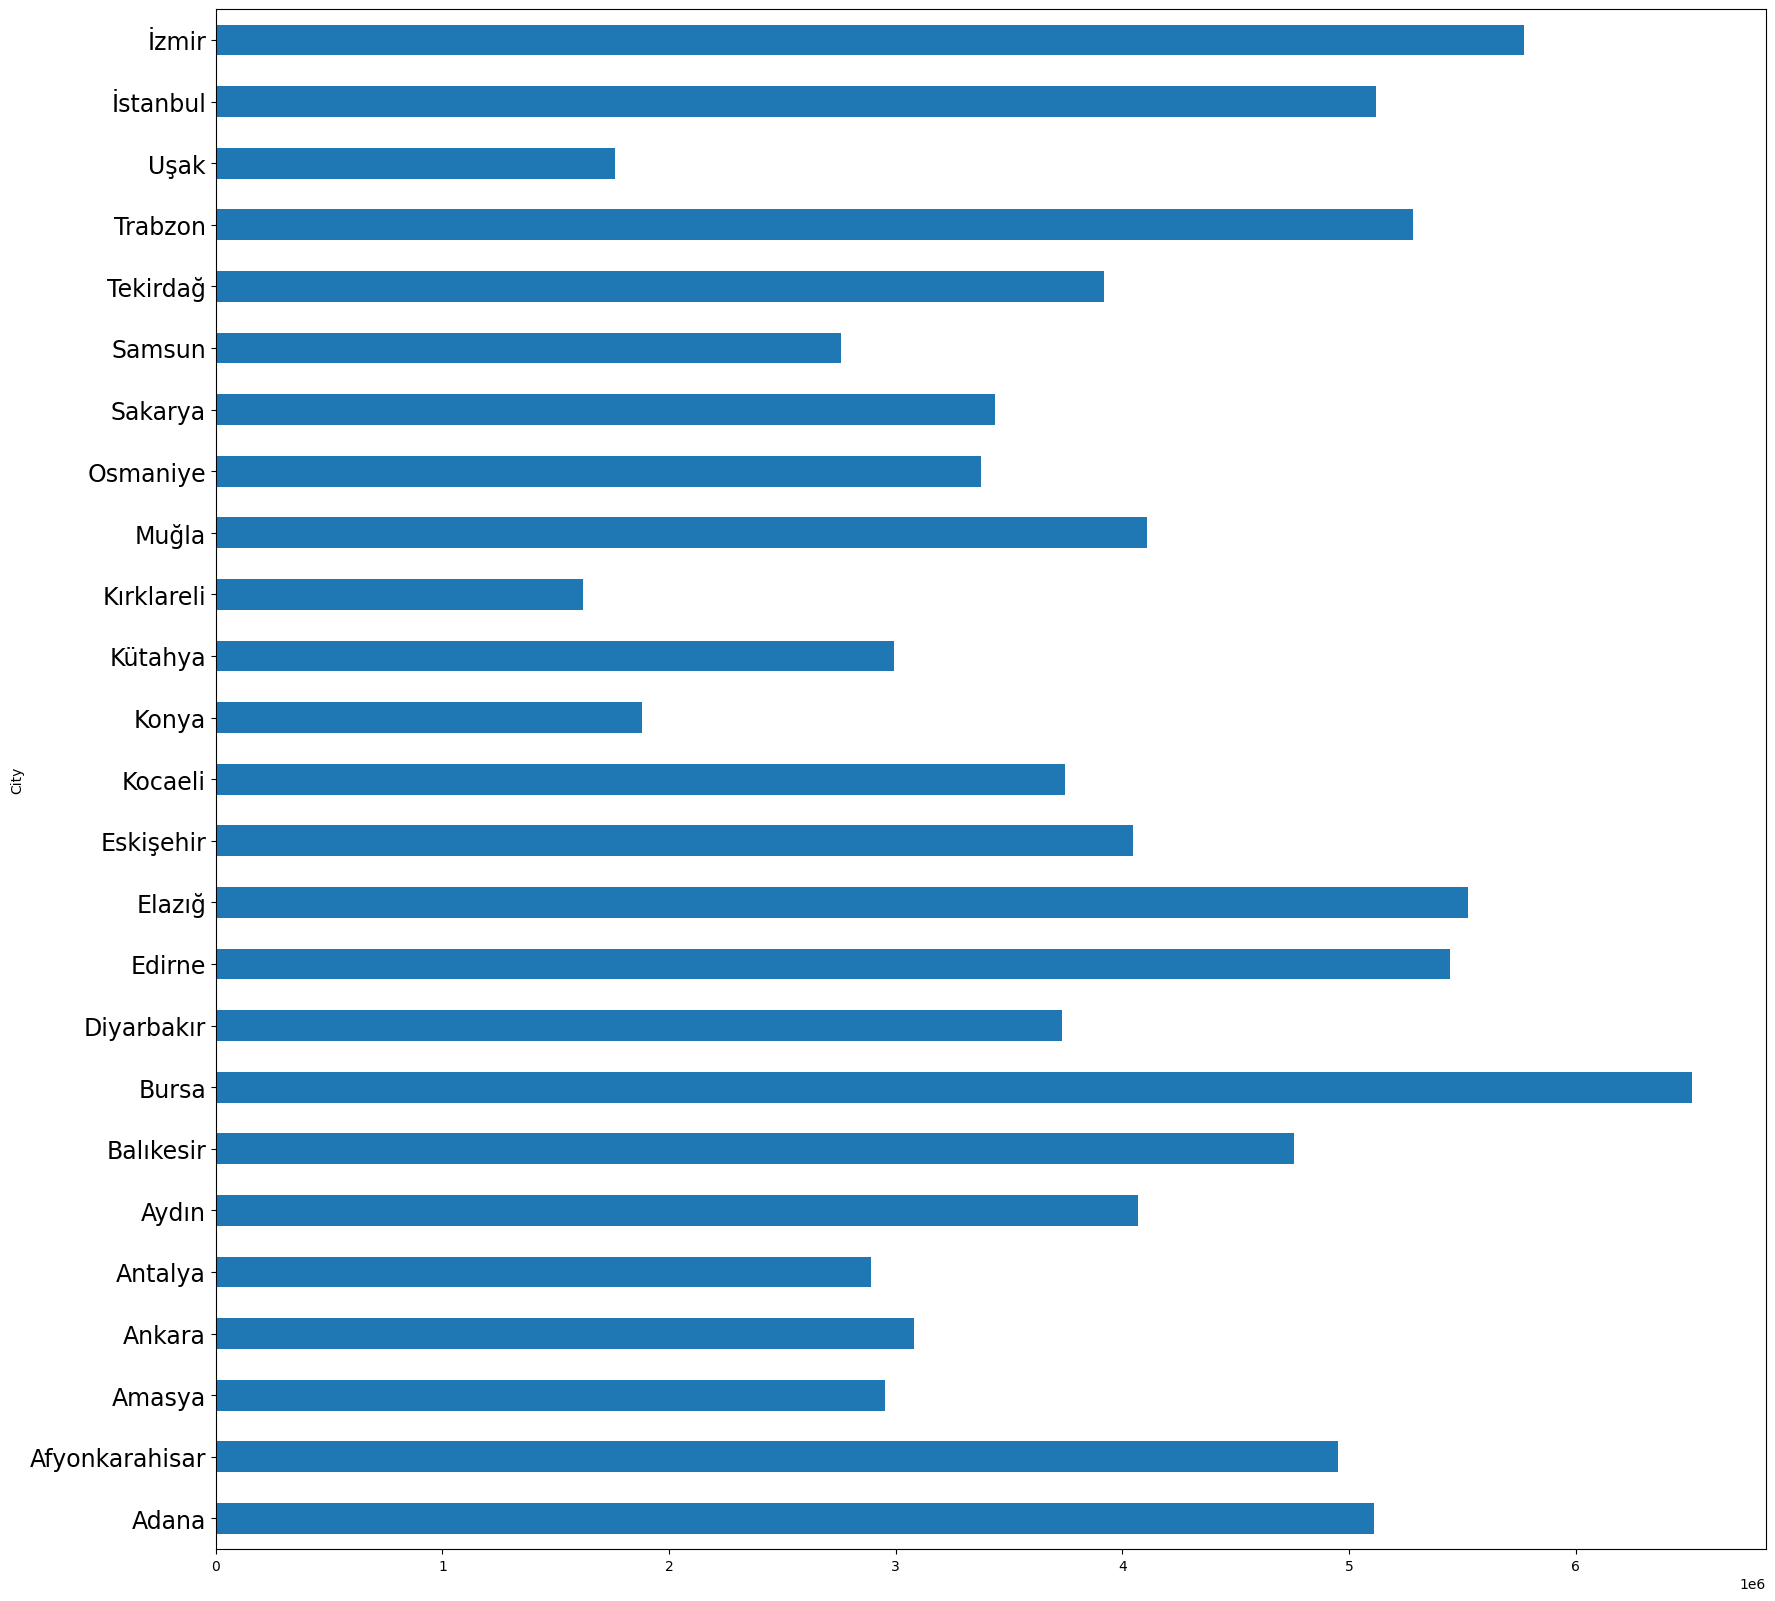

In [24]:
X_train.groupby(['City']).mean()['revenue'].plot.barh(figsize=(20,20))
plt.yticks(fontsize=17)

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\1036946481.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  X_train.groupby(['Type']).mean()['revenue'].plot.bar(ax=ax1)


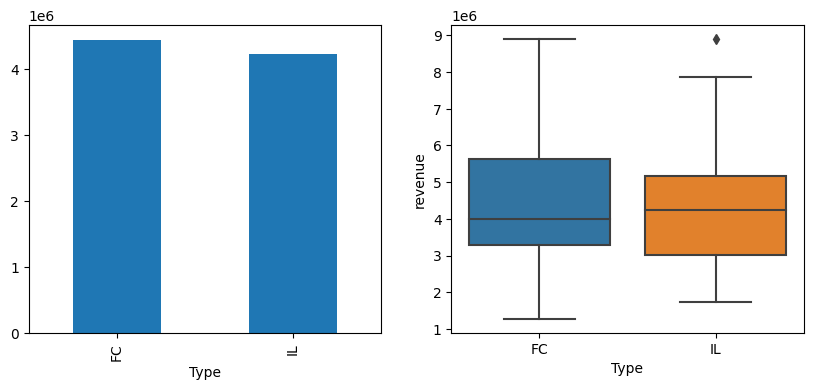

In [25]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,4))
X_train.groupby(['Type']).mean()['revenue'].plot.bar(ax=ax1)
sns.boxplot(x='Type',y='revenue', data=X_train,ax=ax2)
plt.show()

In [26]:
comp_df = pd.concat([X_train, X_test])
comp_df.reset_index(drop=True, inplace=True)

In [27]:
comp_df.Type.value_counts(),comp_df['City Group'].value_counts()

(FC    75
 IL    59
 DT     1
 Name: Type, dtype: int64,
 Big Cities    76
 Other         59
 Name: City Group, dtype: int64)

In [28]:
comp_df.Type = comp_df.Type.map({'MB':0,'DT':1, 'IL':2,'FC':3})
comp_df['City Group'] = comp_df['City Group'].map({'Big Cities':1, 'Other':0})

In [29]:
comp_df.head(3)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,month,year,launch_days
0,90,2013-08-08,İstanbul,1,3,12,7.5,6.0,6.0,2,...,0,0,0,0,0,0,3426169,8,2013,3764 days 14:02:16.718899
1,135,2010-10-29,İstanbul,1,3,4,5.0,4.0,5.0,2,...,0,0,0,0,0,0,7217634,10,2010,4778 days 14:02:16.718899
2,97,2009-01-26,İstanbul,1,3,3,5.0,4.0,4.0,1,...,0,0,0,0,0,0,6694797,1,2009,5419 days 14:02:16.718899


In [30]:
p_name = ['P'+str(i) for i in range(1,38)]
comp_df[p_name] = MinMaxScaler().fit_transform(comp_df[p_name])

In [31]:
comp_df.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P32,P33,P34,P35,P36,P37,revenue,month,year,launch_days
0,90,2013-08-08,İstanbul,1,3,1.000000,1.000000,0.800000,0.666667,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,3426169,8,2013,3764 days 14:02:16.718899
1,135,2010-10-29,İstanbul,1,3,0.272727,0.615385,0.533333,0.444444,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,7217634,10,2010,4778 days 14:02:16.718899
2,97,2009-01-26,İstanbul,1,3,0.181818,0.615385,0.533333,0.222222,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,6694797,1,2009,5419 days 14:02:16.718899
3,66,2010-01-09,Konya,0,3,0.090909,0.153846,0.533333,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,1882131,1,2010,5071 days 14:02:16.718899
4,58,2012-04-11,İstanbul,1,3,0.181818,0.461538,0.533333,0.444444,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,3004429,4,2012,4248 days 14:02:16.718899


In [32]:
comp_df.drop('Open Date',axis=1,inplace=True)
comp_df.drop('launch_days',axis=1,inplace=True)

In [33]:
comp_df['month'] = MinMaxScaler().fit_transform(comp_df[['month']])
comp_df['year'] = MinMaxScaler().fit_transform(comp_df[['year']])

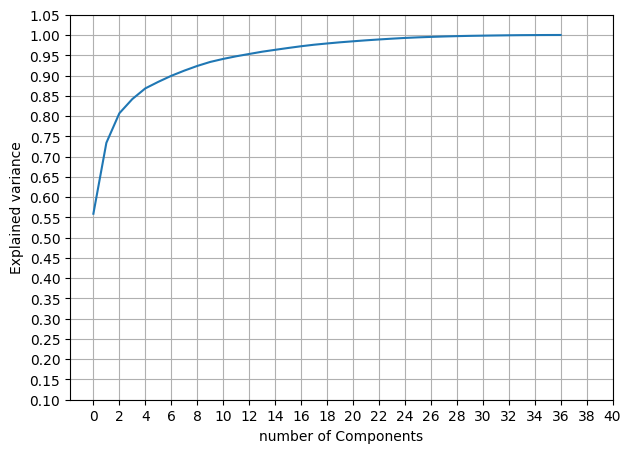

In [34]:
from sklearn.decomposition import PCA
pca = PCA().fit(comp_df[p_name])
plt.figure(figsize=(7,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of Components')
plt.ylabel('Explained variance')
plt.yticks(np.arange(0.1,1.1,0.05))
plt.xticks(np.arange(0,41,2))
plt.grid(True)

In [35]:
pca_list = ['pca'+str(i) for i in range(1,30,1)]
comp_df[pca_list] = PCA(n_components=29).fit_transform(comp_df[p_name])
comp_df.drop(p_name,axis=1,inplace=True)

In [36]:
comp_df.drop('City',axis=1,inplace=True)
comp_df.head()

,Id,City Group,Type,revenue,month,year,pca1,pca2,pca3,pca4,...,pca20,pca21,pca22,pca23,pca24,pca25,pca26,pca27,pca28,pca29
0,90,1,3,3426169,0.636364,0.944444,0.748352,1.446136,0.136330,-0.333287,...,0.004272,0.009297,0.121407,-0.037089,-0.056343,-0.040273,0.109006,0.025276,0.071145,-0.044370
1,135,1,3,7217634,0.818182,0.777778,-0.560406,0.205118,-0.210608,0.038607,...,-0.051012,0.046593,-0.015582,0.026300,0.084652,0.079307,-0.022514,0.001506,-0.038209,-0.009092
2,97,1,3,6694797,0.000000,0.722222,-0.496825,0.171321,0.627143,-0.059713,...,-0.058992,0.081169,-0.106866,0.082590,-0.116217,0.036735,0.003853,-0.043940,-0.030869,0.017386
3,66,0,3,1882131,0.000000,0.777778,-0.795302,-0.042270,-0.323805,0.007984,...,0.046206,-0.056401,-0.006772,0.020724,-0.076261,-0.023302,-0.018365,-0.041914,-0.016019,0.063542
4,58,1,3,3004429,0.272727,0.888889,-0.542099,0.183669,0.074288,-0.130388,...,-0.066377,0.054910,0.047557,0.008638,0.066811,0.015675,-0.023875,0.019082,0.003021,-0.025680


In [37]:
test_df = comp_df[comp_df['revenue'].isnull()]
train_df = comp_df[comp_df['revenue'].notnull()]
test_df.drop('revenue',axis=1, inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_3180\2965048820.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop('revenue',axis=1, inplace=True)


In [38]:
train_df.shape, test_df.shape

((135, 35), (0, 34))

In [39]:
x_train = train_df.drop('revenue',axis=1)
y_train = train_df['revenue']

In [40]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import GridSearchCV, cross_validate, RepeatedKFold

In [41]:
cv = RepeatedKFold(n_splits=10, n_repeats=3)
scores = cross_validate(LGBMRegressor(), x_train,y_train, scoring=['r2','neg_root_mean_squared_error'],cv=cv)
r2 = scores['test_r2']
rmse = scores['test_neg_root_mean_squared_error']
print(np.mean(r2),np.mean(rmse))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000275 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1287
[LightGBM] [Info] Number of data points in the train set: 121, number of used features: 34
[LightGBM] [Info] Start training from score 4377683.553719
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [42]:
# random forest first
cv = RepeatedKFold(n_splits=10, n_repeats=3)
params = {
    'n_estimators':[20,50,100,200],
    'max_depth':[3,5,7],
    'learning_rate':[0.0001,0.001,0.01,0.1,1],
    'boosting_type':['gbdt','dart','goss'],
    'subsample':[0.3,0.5,0.7,1]
}

lgbm_grid = GridSearchCV(LGBMRegressor(random_state=42),params, cv=cv, verbose=1, n_jobs=-1,scoring='neg_root_mean_squared_error')
lgbm_grid.fit(x_train,y_train)

Fitting 30 folds for each of 720 candidates, totalling 21600 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000727 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1426
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 34
[LightGBM] [Info] Start training from score 4296368.007407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=None),
             estimator=LGBMRegressor(random_state=42), n_jobs=-1,
             param_grid={'boosting_type': ['gbdt', 'dart', 'goss'],
                         'learning_rate': [0.0001, 0.001, 0.01, 0.1, 1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [20, 50, 100, 200],
                         'subsample': [0.3, 0.5, 0.7, 1]},
             scoring='neg_root_mean_squared_error', verbose=1)

In [43]:
final_model = LGBMRegressor(boosting_type='dart',max_depth=3,n_estimators=20,random_state=42, subsample=0.3).fit(x_train,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000280 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1426
[LightGBM] [Info] Number of data points in the train set: 135, number of used features: 34
[LightGBM] [Info] Start training from score 4296368.007407
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# program for prediction
test_file = pd.read_csv('../input/Shopping malls-revenue-prediction/test.csv.zip')
answer = pd.DataFrame(final_model.predict(test_df))
answer.columns = ['Prediction']
answer['Id'] = test_file.index.tolist()
answer.set_index('Id',inplace=True)